In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

from sklearn.mixture import GaussianMixture

import fppnpx as fn
from fppnpx.FPPGLM import FPPGLM
from fppnpx.signalfuncs import load_signal, gen_all_channel_signals
from wavemapnpx.WaveMAPClassifier import WaveMAPClassifier

/opt/miniconda3/envs/wavemapspec/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
CUSTOM_PAL_SORT_3 = ['#5e60ce', '#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da', '#1eb43a']
cmap = colormaps.get_cmap('Set1')

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [4]:
apath = "/Users/mateouma/Downloads/monkey datasets/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0_t0.exported.imec0.ap-001.bin"
cpath = "/Users/mateouma/Downloads/monkey datasets/cluster_info_task.tsv"
wpath = "/Users/mateouma/Downloads/monkey datasets/20230630_DLPFCwaveforms.mat"

fs = 30000
time_window = [100,123] # seconds within the recording

signal_dataset = load_signal(appath=apath, time_window=time_window, fs=fs, cipath=cpath, wfpath=wpath)
channel_signals = gen_all_channel_signals(signal_dataset, 300, False)

Generated 112 channel signals.


In [5]:
# takes the average waveform from each unit
mean_unit_waveforms = np.array(signal_dataset["waveform_info"]["waveforms"]).mean(axis=2)
mean_unit_waveforms.shape

(138, 62)

In [6]:
wavemap_cluster_labels = np.load("chkdelay_dlpfc_0630_wavemap_clusters_0421.npy")
wavemap_cluster_labels

array([0, 1, 0, 4, 3, 4, 5, 4, 4, 4, 4, 5, 7, 5, 0, 1, 3, 5, 7, 8, 0, 5,
       8, 3, 3, 8, 4, 5, 2, 4, 7, 3, 8, 7, 3, 4, 7, 8, 1, 2, 6, 3, 0, 1,
       6, 8, 3, 7, 4, 7, 4, 7, 4, 7, 8, 6, 1, 1, 1, 7, 1, 6, 3, 1, 8, 1,
       7, 2, 8, 7, 1, 8, 1, 1, 8, 5, 8, 8, 8, 6, 4, 6, 1, 0, 0, 7, 0, 6,
       6, 5, 2, 7, 4, 6, 7, 0, 3, 2, 6, 3, 6, 0, 1, 6, 0, 6, 4, 0, 5, 5,
       0, 0, 5, 2, 5, 5, 3, 8, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 8, 8, 5, 8, 5], dtype=int32)

In [7]:
waveforms_scaled = waveforms = (mean_unit_waveforms - mean_unit_waveforms.mean(axis=1)[:,None]) / np.abs(mean_unit_waveforms).max(axis=1)[:,None]

In [8]:
gm = GaussianMixture(n_components=6, random_state=0)
unit_labs = gm.fit_predict(waveforms_scaled)
unit_labs

array([0, 4, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 5, 0, 0, 5, 0, 0, 5, 4, 0, 0,
       4, 0, 0, 0, 1, 0, 2, 1, 1, 0, 4, 5, 0, 1, 1, 4, 5, 2, 5, 0, 0, 5,
       5, 4, 0, 1, 1, 1, 1, 4, 1, 5, 4, 5, 5, 5, 5, 1, 4, 5, 0, 5, 4, 5,
       5, 3, 4, 1, 5, 4, 4, 4, 4, 0, 4, 4, 4, 5, 1, 5, 4, 0, 0, 5, 0, 5,
       5, 0, 3, 5, 1, 5, 5, 0, 0, 2, 5, 0, 5, 0, 5, 5, 0, 5, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 4, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1,
       1, 4, 4, 0, 4, 0])

In [9]:
CUSTOM_PAL_SORT_4 = ['#7F58AF', '#64C5EB', 'gray', 'gray', '#E84D8A', '#FEB326']

Text(0.5, 1.0, 'Normalized Mean Unit Waveforms')

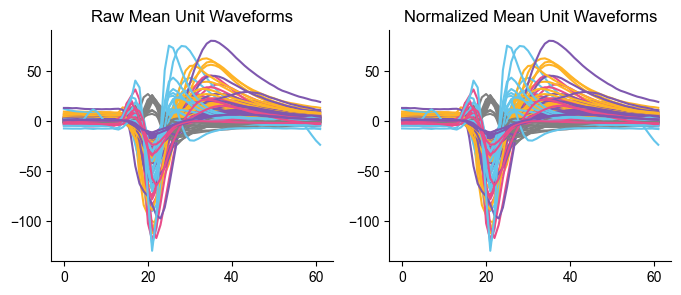

In [10]:
fig, ax = plt.subplots(1,2, figsize=(8,3))

for i,wf in enumerate(mean_unit_waveforms):
    ax[0].plot(wf, color=CUSTOM_PAL_SORT_4[unit_labs[i]])
    ax[1].plot(wf, color=CUSTOM_PAL_SORT_4[unit_labs[i]])
ax[0].set_title("Raw Mean Unit Waveforms")    
ax[1].set_title("Normalized Mean Unit Waveforms")

In [11]:
bsns_lab_dict = {
    0: 'Broad-Spiking',
    1: 'Narrow-Spiking Triphasic',
    2: 'Neurite',
    3: 'Neurite',
    4: 'Broad-Spiking Triphasic',
    5: 'Narrow-Spiking'
}

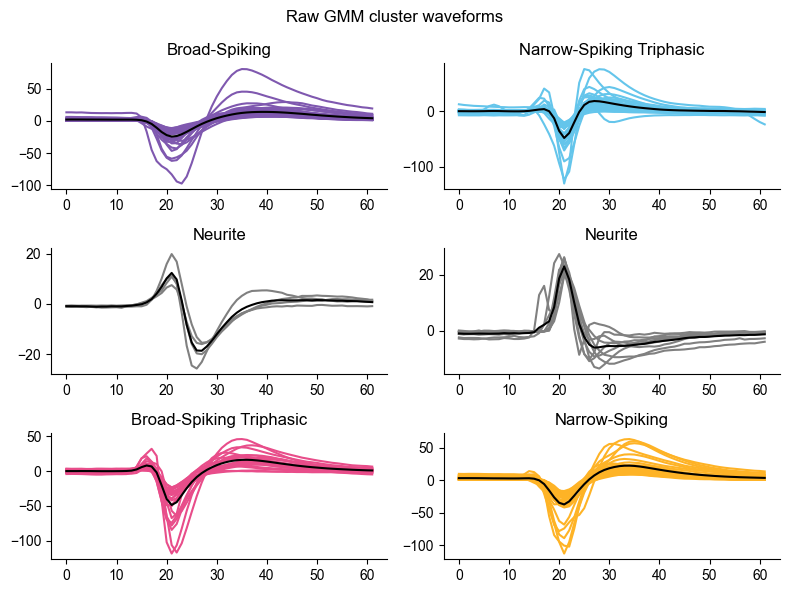

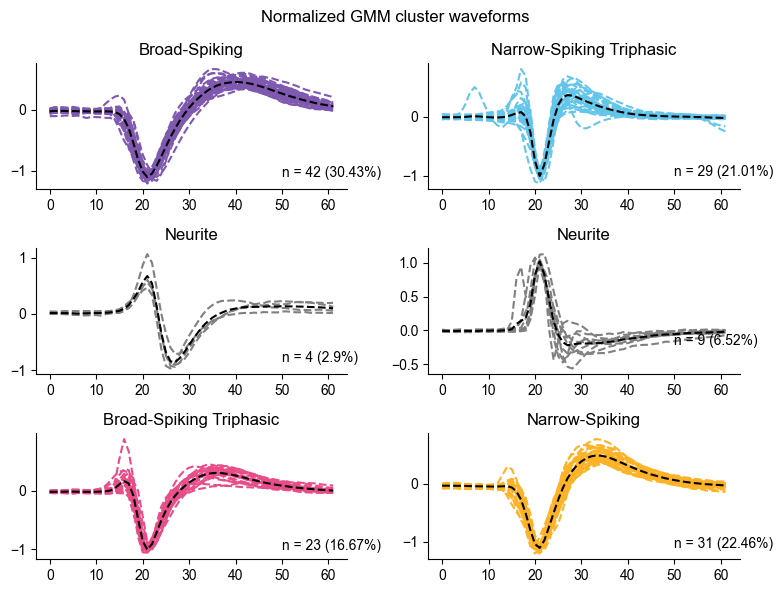

In [12]:
fig, ax = plt.subplots(3,2, figsize=(8,6))

ax = ax.flatten()

for gm_lab in range(6):

    gm_waveforms = mean_unit_waveforms[unit_labs == gm_lab].T
    gm_waveforms_scaled = waveforms_scaled[unit_labs == gm_lab].T

    ax[gm_lab].plot(gm_waveforms, color=CUSTOM_PAL_SORT_4[gm_lab])
    #plt.plot(gm_waveforms_scaled, color=CUSTOM_PAL_SORT_3[gm_lab], linestyle='--')

    ax[gm_lab].plot(gm_waveforms.mean(axis=1), color='k')
    ax[gm_lab].set_title(bsns_lab_dict[gm_lab])
fig.suptitle("Raw GMM cluster waveforms")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(3,2, figsize=(8,6))

ax = ax.flatten()

for gm_lab in range(6):

    gm_waveforms = mean_unit_waveforms[unit_labs == gm_lab].T
    gm_waveforms_scaled = waveforms_scaled[unit_labs == gm_lab].T
    gm_waveform_scaled_mean = gm_waveforms_scaled.mean(axis=1)

    #ax[gm_lab].plot(gm_waveforms, color=CUSTOM_PAL_SORT_3[gm_lab])
    ax[gm_lab].plot(gm_waveforms_scaled, color=CUSTOM_PAL_SORT_4[gm_lab], linestyle='--')
    ax[gm_lab].plot(gm_waveform_scaled_mean , color='k', linestyle='--')
    ax[gm_lab].text(50, np.min(gm_waveform_scaled_mean), f'n = {np.sum(unit_labs == gm_lab)} ({np.round(np.sum(unit_labs == gm_lab) / len(unit_labs) * 100, 2)}%)')
    ax[gm_lab].set_title(f'{bsns_lab_dict[gm_lab]}')
fig.suptitle("Normalized GMM cluster waveforms")
plt.tight_layout()
plt.show()

In [13]:
bsns_cluster_mean_wfs = []

for i in range(6):
    bsns_cluster_mean_wf = waveforms_scaled[unit_labs == i].mean(axis=0)
    bsns_cluster_mean_wfs.append(bsns_cluster_mean_wf)

In [14]:
def extract_mean_kernels(waveform_arr):
    time_kernel_means = []
    frequency_kernel_means = []
    kernel_psd_means = []
    kernel_psd_ATKs = []

    for bn_lab_ix in range(6):
        group_waveforms = waveform_arr[unit_labs == bn_lab_ix]

        time_kernels = []
        frequency_kernels = []
        kernel_psds = []

        for waveform in group_waveforms:
            kernel_t,kernel_f,kernel_psd,freq_axis = fn.filterfuncs.gen_filter(waveform, fs, fs, center=True)
            time_kernels.append(kernel_t)
            frequency_kernels.append(kernel_f)
            kernel_psds.append(kernel_psd)

        time_kernel_mean = np.array(time_kernels).mean(axis=0)
        freq_kernel_mean = np.array(frequency_kernels).mean(axis=0)
        kernel_psd_mean = np.array(kernel_psds).mean(axis=0) 

        # get the PSD of the average time kernel across the group
        _,__,kernel_psd_ATK,___ = fn.filterfuncs.gen_filter(time_kernel_mean, fs, fs, center=True)

        time_kernel_means.append(time_kernel_mean)
        frequency_kernel_means.append(freq_kernel_mean)
        kernel_psd_means.append(kernel_psd_mean)
        kernel_psd_ATKs.append(kernel_psd_ATK)

    time_kernels = np.array(time_kernel_means)
    freq_kernels = np.array(frequency_kernel_means)
    kernel_psds = np.array(kernel_psd_means)
    kernel_psds_ATK = np.array(kernel_psd_ATKs)

    return time_kernels,freq_kernels,kernel_psds,kernel_psds_ATK,freq_axis

In [15]:
time_kernels_raw,freq_kernels_raw,kernel_psds_raw,kernel_psds_ATK_raw,freq_axis = extract_mean_kernels(mean_unit_waveforms)
time_kernels_sc,freq_kernels_sc,kernel_psds_sc,kernel_psds_ATK_sc,freq_axis = extract_mean_kernels(waveforms_scaled)

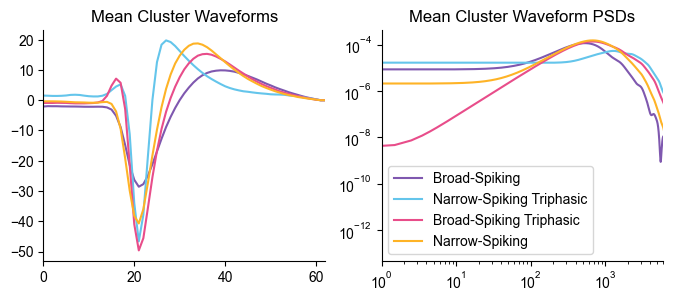

In [51]:
fig, ax = plt.subplots(1,2, figsize=(8,3))

for gm_lab in [0,1,4,5]:
    ax[0].plot(time_kernels_raw[gm_lab], color=CUSTOM_PAL_SORT_4[gm_lab], label=bsns_lab_dict[gm_lab])
    ax[1].loglog(freq_axis, kernel_psds_ATK_raw[gm_lab], color=CUSTOM_PAL_SORT_4[gm_lab], label=bsns_lab_dict[gm_lab])
ax[0].set_xlim((0,62))
ax[1].set_xlim((1,6000))
ax[0].set_title("Mean Cluster Waveforms")
ax[1].set_title("Mean Cluster Waveform PSDs")    
# ax[0].legend()
ax[1].legend()

In [17]:
from numpy.lib.stride_tricks import sliding_window_view

In [18]:
# calculate spike trains

Nt = channel_signals["ch13"].time_axis.size # number of time points
Nu = signal_dataset['units'].size # number of units

spike_trains_unsorted = np.zeros((Nt, Nu))
units_unsorted = []

u_idx = 0
for ch,ch_sig in channel_signals.items():
    for u, spktimes in ch_sig.spike_times.items():
        spike_trains_unsorted[spktimes.astype(int),u_idx] = 1
        units_unsorted.append(u)
        u_idx += 1

spike_trains = spike_trains_unsorted[:,np.argsort(units_unsorted)]

In [19]:
def calculate_unit_firing_rate(chanID, unitID, fs, window_size=0.5, step_size=0.5):
    twindow = int(window_size * fs)
    tstep = int(step_size * fs)

    unit_spk_train = np.zeros(Nt)
    unit_spk_train[channel_signals[chanID].spike_times[unitID].astype(int)] = 1
    unit_spk_train_windowed = sliding_window_view(unit_spk_train, window_shape=twindow)
    unit_firing_rate = unit_spk_train_windowed[::tstep].sum(axis=1) / window_size

    return unit_firing_rate

In [20]:
def calculate_firing_rates(spike_trains, fs, window_size=0.5, step_size=0.5, cluster_labels=None):
    cluster_firing_rates = []
    cluster_mean_firing_rates = []
    cluster_ste_firing_rates = []

    twindow = int(window_size * fs)
    tstep = int(step_size * fs)
    
    if cluster_labels is not None:
        cluster_lab_dir = np.unique(cluster_labels)
        N_clust = cluster_lab_dir.size

        cluster_mask = [np.where(cluster_labels == cl)[0] for cl in cluster_lab_dir]
    else:
        N_clust = 1
        cluster_mask = [np.arange(spike_trains.shape[1])]

    for cl in range(N_clust):
        cluster_spk_trains = spike_trains[:,cluster_mask[cl]]

        windowed_spk_trains = sliding_window_view(cluster_spk_trains, window_shape=twindow, axis=0)
        firing_rates = windowed_spk_trains[::tstep].sum(axis=2) / window_size

        cluster_firing_rates.append(firing_rates.sum(axis=1))
        cluster_mean_firing_rates.append(firing_rates.mean(axis=1))
        cluster_ste_firing_rates.append(firing_rates.std(axis=1) / np.sqrt(firing_rates.shape[1]))

    if cluster_labels is None:
        cluster_firing_rates = cluster_firing_rates[0]
        cluster_mean_firing_rates = cluster_mean_firing_rates[0]
        cluster_ste_firing_rates = cluster_ste_firing_rates[0]

    return cluster_firing_rates, cluster_mean_firing_rates, cluster_ste_firing_rates

In [21]:
bsns_frs,bsns_mean_frs,bsns_ste_frs = calculate_firing_rates(spike_trains, fs, cluster_labels=unit_labs)

In [22]:
pop_frs,mean_pop_frs,__ = calculate_firing_rates(spike_trains, fs)

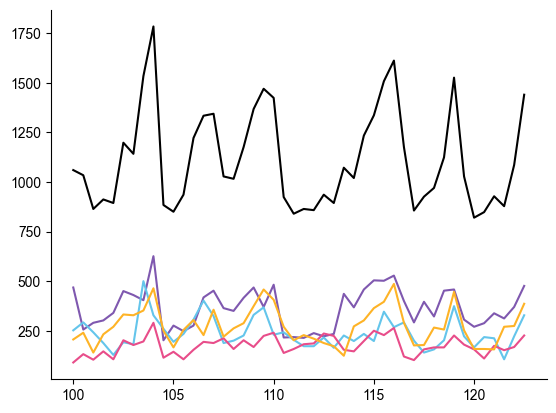

In [23]:
fr_t = np.arange(time_window[0], time_window[1], 0.5)
for i in [0,1,4,5]:
    plt.plot(fr_t, bsns_frs[i], color=CUSTOM_PAL_SORT_4[i])
plt.plot(fr_t, pop_frs, color='k')

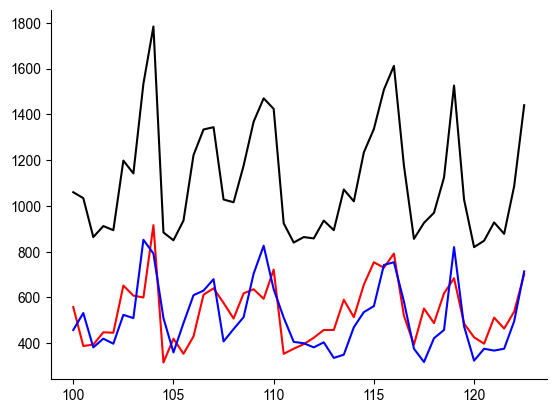

In [52]:
fr_t = np.arange(time_window[0], time_window[1], 0.5)
plt.plot(fr_t, bsns_frs[0] + bsns_frs[4], color='red')
plt.plot(fr_t, bsns_frs[1] + bsns_frs[5], color='blue')
plt.plot(fr_t, pop_frs, color='k')

In [24]:
unit_total_rec_frs = np.array(signal_dataset['waveform_info']['fr'])

In [25]:
unit_fr_dict = {}
unit_pop_r2 = {}

for ch in signal_dataset['channel_unit_index'].keys():
    for u_id in signal_dataset['channel_unit_index'][ch]:
        unit_fr = calculate_unit_firing_rate(f'ch{ch}', u_id, fs)
        unit_fr_dict[u_id] = unit_fr

        #X = sm.add_constant(unit_fr)
        #modres = sm.OLS(pop_frs, X).fit()
        unit_pop_r2[u_id] = np.corrcoef(unit_fr, pop_frs)[0,1]

rvals = np.array([unit_pop_r2[u_id] for u_id in signal_dataset['units']])

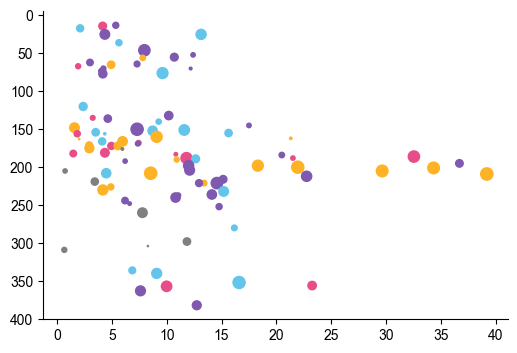

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(unit_total_rec_frs,np.sort(signal_dataset['channels']), # this is wrong
            c=np.array(CUSTOM_PAL_SORT_4)[unit_labs],
            s=rvals*100)
plt.gca().invert_yaxis()

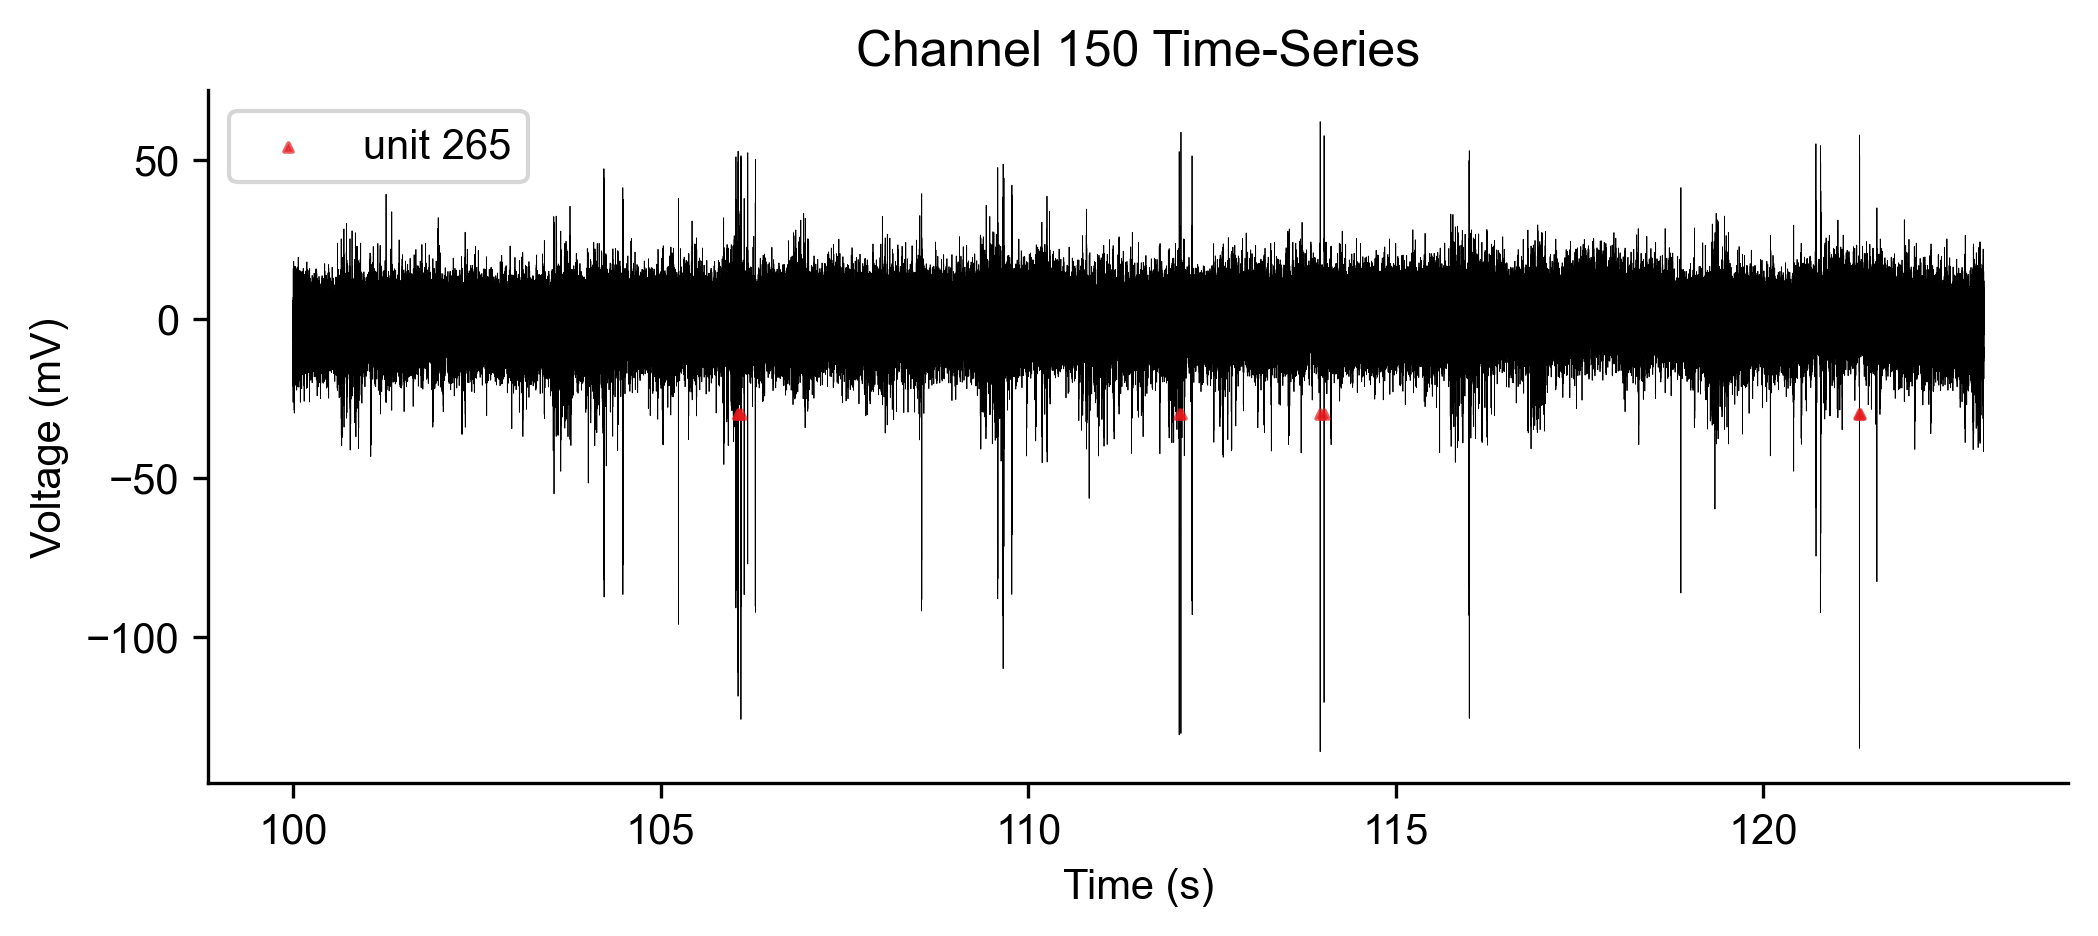

In [27]:
channel_signals['ch150'].plot_signal()

In [36]:
from fppnpx.FPPSSM import FPPSSM

In [126]:
filter_psd_list_ssm = kernel_psds_ATK_raw[[0,1,4,5],:]

In [132]:
fppssm_full = FPPSSM(channel_signals['ch150'].time_series, channel_signals['ch150'].time_axis, fs)

Model instantiated


In [133]:
fppssm_full.fit_mv(filter_psd_list_ssm, freq_axis, 20)

Instantiating model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_1, alpha_2, alpha_3, alpha_4, sigma, d_0, d_1, d_2, d_3, d_4, d_5, d_6, d_7, d_8, d_9, d_10, d_11, d_12, d_13, d_14, d_15, d_16, d_17, d_18, d_19, d_20, d_21, d_22, d_23, d_24, d_25, d_26, d_27, d_28, d_29, d_30, d_31, d_32, d_33, d_34, d_35, d_36, d_37, d_38, d_39, d_40, d_41, d_42, d_43, d_44, d_45]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 46090 seconds.


In [145]:
fppssm_full.trace_back.posterior.data_vars

Data variables:
    d_0      (chain, draw, d_0_dim_0) float64 128kB 124.7 176.1 ... -106.8 -56.0
    d_1      (chain, draw, d_1_dim_0) float64 128kB 344.1 642.9 ... 692.9
    d_2      (chain, draw, d_2_dim_0) float64 128kB 345.8 753.0 ... 873.5
    d_3      (chain, draw, d_3_dim_0) float64 128kB 411.3 790.4 ... 889.8
    d_4      (chain, draw, d_4_dim_0) float64 128kB 359.4 762.1 ... 997.0
    d_5      (chain, draw, d_5_dim_0) float64 128kB 330.6 720.7 ... 983.5
    d_6      (chain, draw, d_6_dim_0) float64 128kB 370.8 758.3 ... 988.0
    d_7      (chain, draw, d_7_dim_0) float64 128kB 420.8 875.7 ... 1.03e+03
    d_8      (chain, draw, d_8_dim_0) float64 128kB 377.6 880.2 ... 1.009e+03
    d_9      (chain, draw, d_9_dim_0) float64 128kB 373.5 820.5 ... 965.4
    d_10     (chain, draw, d_10_dim_0) float64 128kB 470.2 863.4 ... 995.6
    d_11     (chain, draw, d_11_dim_0) float64 128kB 407.5 895.5 ... 952.3
    d_12     (chain, draw, d_12_dim_0) float64 128kB 407.3 925.3 ... 1.028e+03
 

In [146]:
rate_preds = []

for i in range(46):
    rate_preds.append(fppssm_full.trace_back.posterior.data_vars[f'd_{i}'].mean(axis=(0,1)).values)

rate_preds = np.array(rate_preds)

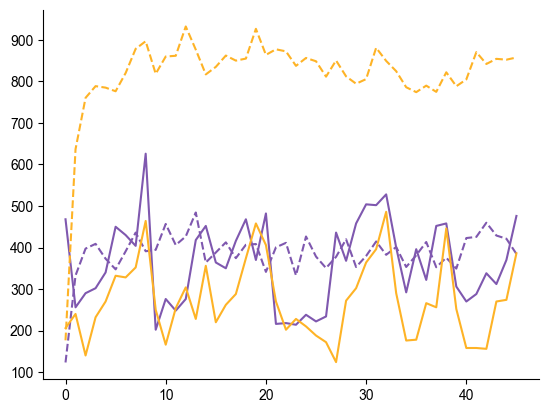

In [158]:
for i,c in enumerate([0,5]):
    plt.plot(rate_preds[:,i], color=CUSTOM_PAL_SORT_4[c], linestyle='--')
    plt.plot(bsns_frs[c], color=CUSTOM_PAL_SORT_4[c])